In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("D:\\DATASETS\\GOAT.xlsx",parse_dates=['date'])

In [3]:
df

,district,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
0,Adilabad,2018-01-01,0.0,10.4,29.7,41.8,83.8,0.0,5.7
1,Adilabad,2018-01-02,0.0,11.2,34.8,29.8,74.6,0.0,4.8
2,Adilabad,2018-01-03,0.0,17.3,38.0,31.8,71.5,0.0,3.4
3,Adilabad,2018-01-04,0.0,27.3,41.0,24.9,75.6,0.0,7.7
4,Adilabad,2018-01-05,0.0,28.7,43.2,27.7,48.9,0.0,13.5
...,...,...,...,...,...,...,...,...,...
1729,Adilabad,2022-09-26,0.0,22.6,32.7,62.2,100.0,0.0,9.4
1730,Adilabad,2022-09-27,2.3,23.9,33.0,65.2,98.8,0.0,12.9
1731,Adilabad,2022-09-28,4.0,22.6,32.5,70.6,100.0,0.0,7.1
1732,Adilabad,2022-09-29,1.0,23.4,31.6,71.0,100.0,0.0,9.9


In [4]:
df=df.resample('M',on='date').mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_11464\1019588445.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.resample('M',on='date').mean()


In [5]:
df

,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
date,,,,,,,
2018-01-31,1.151613,15.241935,33.187097,40.567742,79.909677,0.051613,6.896774
2018-02-28,1.350000,19.053571,34.964286,43.907143,80.328571,0.007143,6.846429
2018-03-31,0.370968,21.493548,36.445161,39.716129,72.570968,0.003226,6.293548
2018-04-30,0.093333,24.910000,38.920000,37.963333,68.506667,0.030000,8.373333
2018-05-31,1.532258,26.441935,40.070968,39.064516,71.164516,0.296774,9.967742
2018-06-30,3.586667,24.420000,35.080000,55.486667,82.226667,0.440000,10.196667
2018-07-31,6.858065,23.596774,31.577419,65.890323,87.141935,0.529032,9.464516
2018-08-31,9.422581,22.738710,31.145161,68.932258,92.670968,0.593548,8.354839
2018-09-30,4.303333,22.630000,33.913333,53.756667,91.666667,0.063333,8.320000


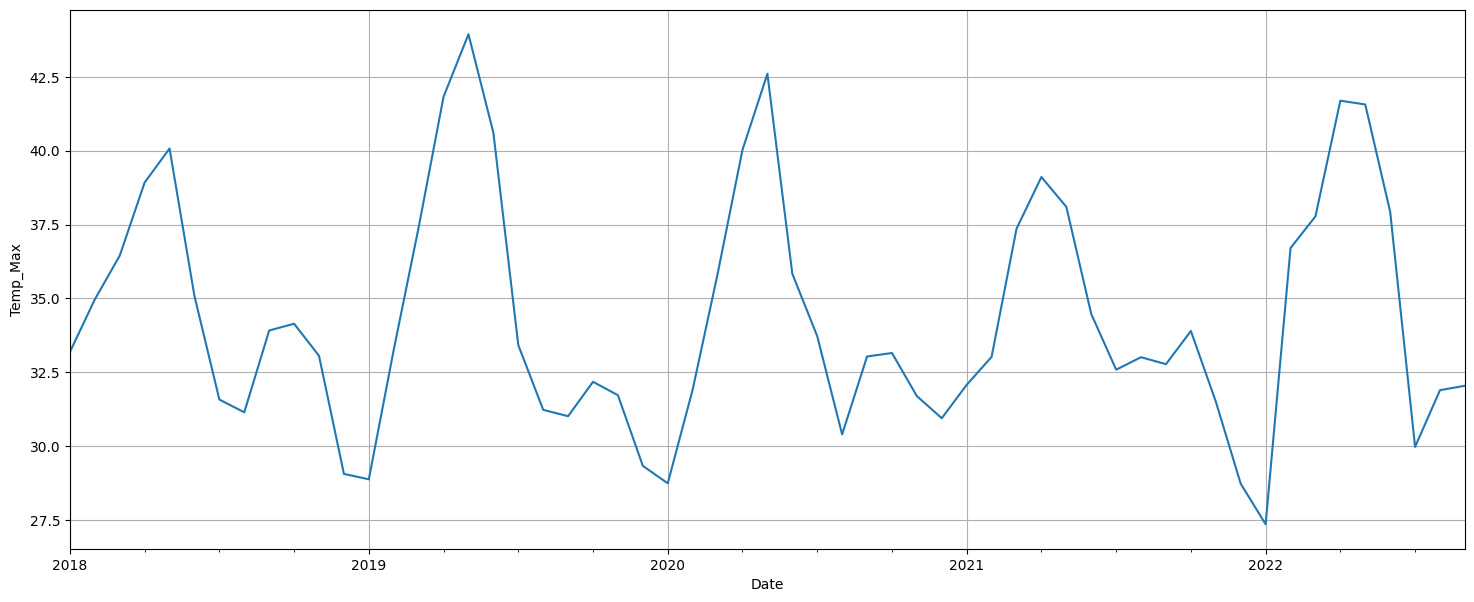

In [6]:
df['temp_max'].plot(figsize=(18,7))
plt.xlabel("Date")
plt.ylabel("Temp_Max")
plt.grid()
plt.show()

In [7]:
adfuller(df['temp_max'])

(-7.045429049163743,
 5.703193129890658e-10,
 7,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 186.99842225981556)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


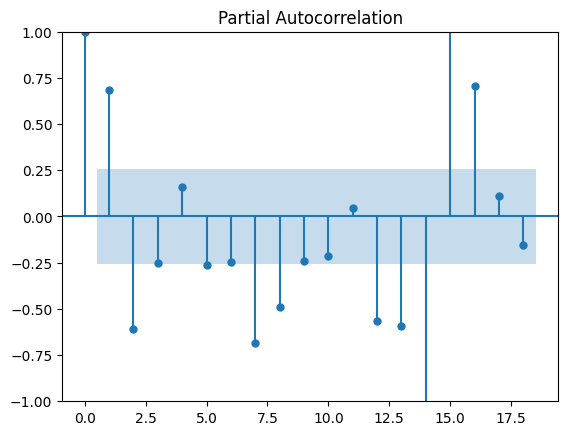

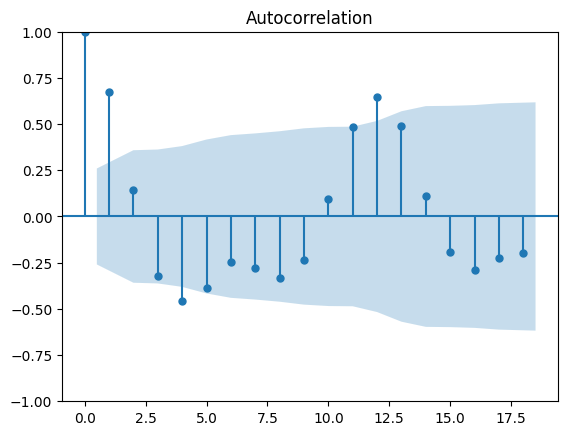

In [8]:
plot_pacf(df['temp_max'])
plot_acf(df['temp_max'])
plt.show()

In [9]:
df['diff12']=df['temp_max'].diff(12)

In [10]:
df.head(3)

,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min,diff12
date,,,,,,,,
2018-01-31,1.151613,15.241935,33.187097,40.567742,79.909677,0.051613,6.896774,NaN
2018-02-28,1.350000,19.053571,34.964286,43.907143,80.328571,0.007143,6.846429,NaN
2018-03-31,0.370968,21.493548,36.445161,39.716129,72.570968,0.003226,6.293548,NaN


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


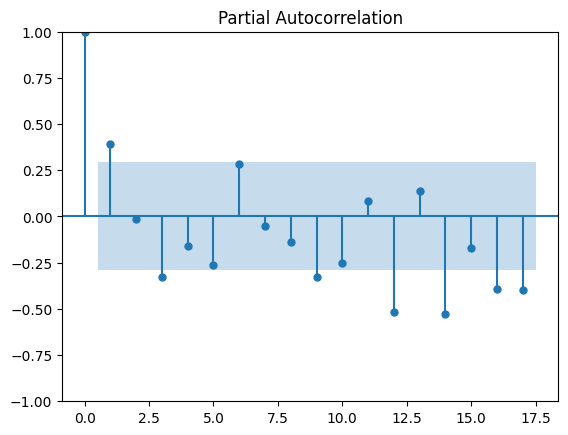

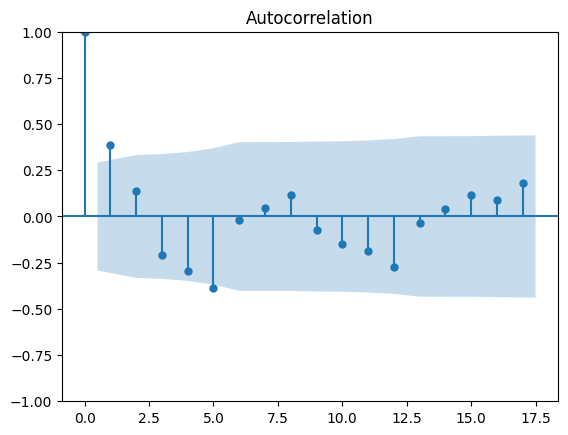

In [11]:
plot_pacf(df['diff12'].dropna())
plot_acf(df['diff12'].dropna())
plt.show()

In [13]:
train=df[:len(df)*80//100]
test=df[len(df)*80//100:]

In [39]:
model=sm.tsa.statespace.SARIMAX(train['temp_max'],order=(1,0,2),seasonal_order=(1,0,2,12))

In [40]:
model_fit=model.fit()

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [41]:
predictions=model_fit.predict(start=test.index[0],end=test.index[-1])

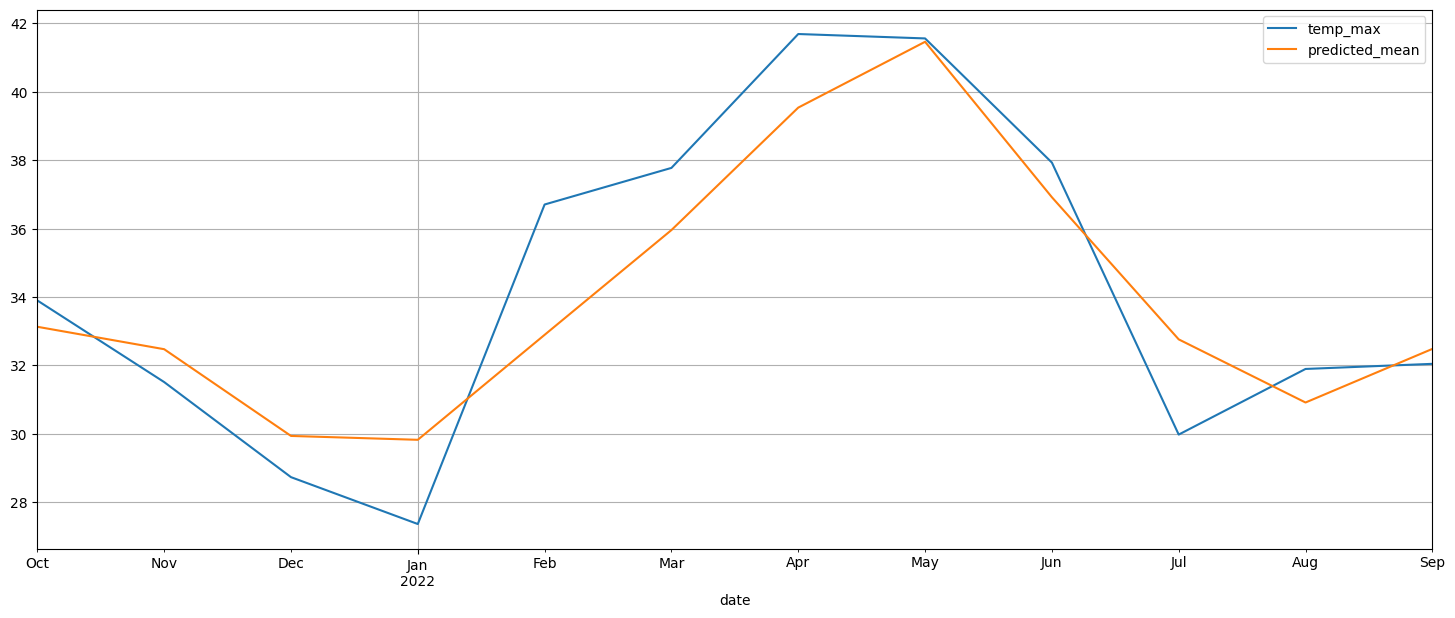

In [42]:
test['temp_max'].plot(figsize=(18,7),legend=True)
predictions.plot(legend=True)
plt.grid()

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
np.sqrt(mean_squared_error(test['temp_max'],predictions))

1.8585525040196504

In [45]:
future=pd.DataFrame(pd.date_range("2022-10-01","2023-09-30",freq='MS'),columns=['date'])

In [46]:
future.set_index('date',inplace=True)

In [47]:
Forecast=model_fit.predict(start=future.index[0],end=future.index[-1])

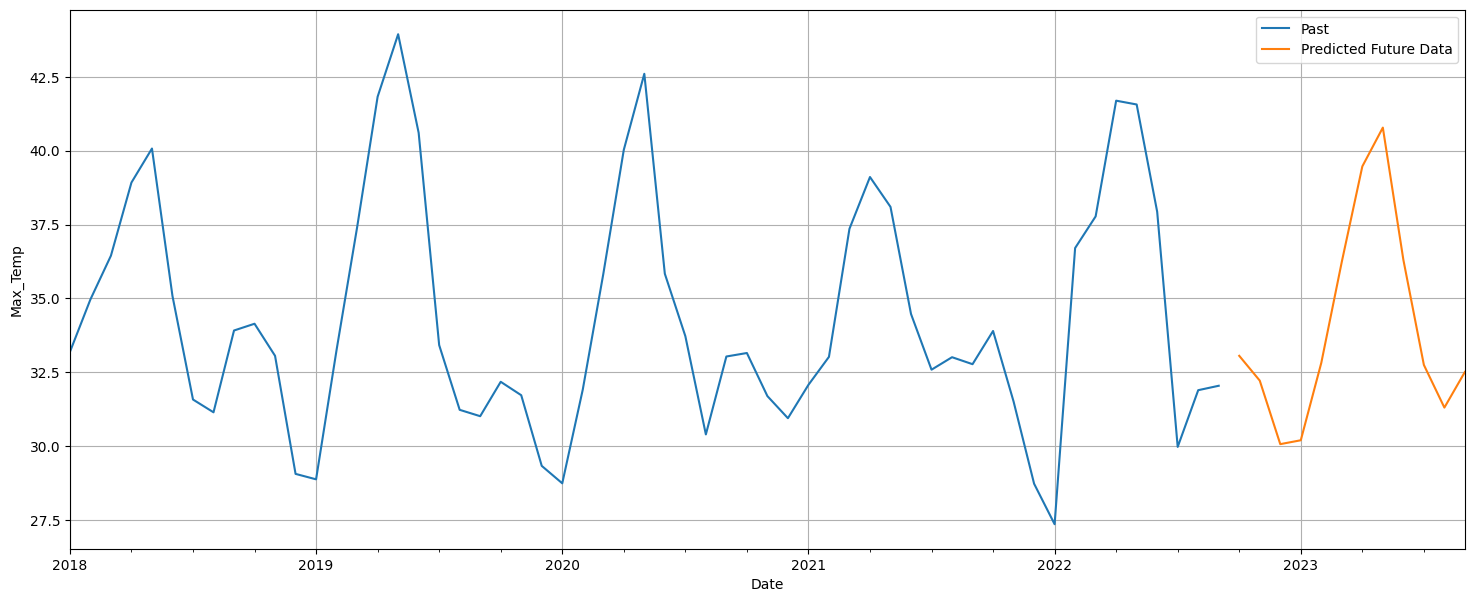

In [49]:
ax=df['temp_max'].plot(label="Past Data")
Forecast.plot(ax=ax,label="Predicted Future data",figsize=(18,7))
plt.xlabel("Date")
plt.ylabel("Max_Temp")
plt.legend(["Past","Predicted Future Data"])
plt.grid()
plt.show()

In [50]:
Forecast

2022-10-31    33.056544
2022-11-30    32.217662
2022-12-31    30.067992
2023-01-31    30.199001
2023-02-28    32.819574
2023-03-31    36.240871
2023-04-30    39.466195
2023-05-31    40.778755
2023-06-30    36.307542
2023-07-31    32.748792
2023-08-31    31.304691
2023-09-30    32.510803
Freq: M, Name: predicted_mean, dtype: float64